In [27]:
import cv2 #type: ignore
import numpy as np #type: ignore
import matplotlib.pyplot as plt #type: ignore


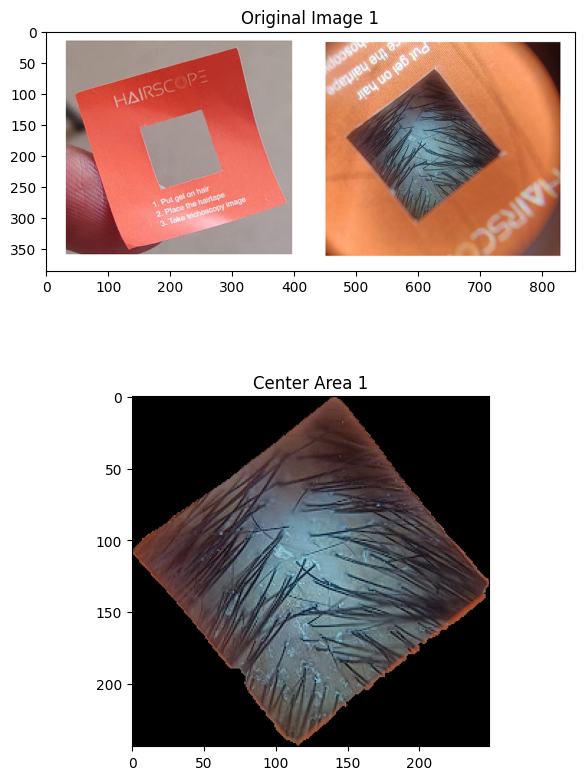

In [26]:

def extract_center_area(image, output_path):

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    # Convert to grayscale
    
   
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # Apply Gaussian blur to reduce noise
    
    # Apply threshold to get binary image
    _, binary = cv2.threshold(blurred, 110, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Get the largest contour which will be the cut-out area
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Create a mask for the largest contour
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)
    
    # Extract the center area using the mask
    center_area = cv2.bitwise_and(image, image, mask=mask)
    
    # Find bounding box coordinates to crop the center area
    x, y, w, h = cv2.boundingRect(largest_contour)
    cropped_center_area = center_area[y:y+h, x:x+w]
    
    # Save the extracted center area to disk
    cv2.imwrite(output_path, cropped_center_area)
    
    return cropped_center_area

# Load the images
image1 = cv2.imread('Screenshot 2024-07-10 092955.png')

# Extract center area and save the result
output_path = 'center_area1.png'
center_area1 = extract_center_area(image1, output_path)

# Display the results
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)), plt.title('Original Image 1')
plt.subplot(2, 2, 3), plt.imshow(cv2.cvtColor(center_area1, cv2.COLOR_BGR2RGB)), plt.title('Center Area 1')
plt.show()

